# 11. Introdução e Preparação

- Modelos Pré Treinados: 21MB; 48MB; 550MB;
- Etapas Iniciais:
    - Instalar módulo spacy;
    - Download do modelo pré-treinado em português;
    - Carregar módulo spacy;
    - Carregar modelo: cria objeto nlp;

## Pipeline Spacy

O método nlp produz um objeto DOC, que é processado de acordo com um pipeline.

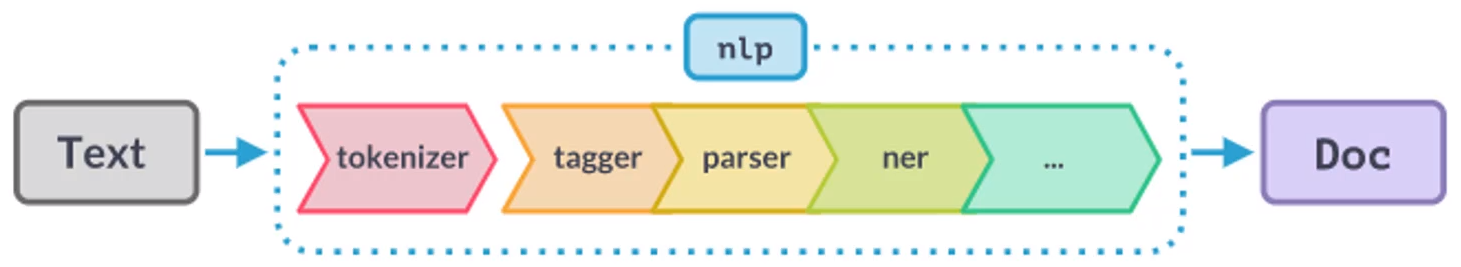

In [1]:
from PIL import Image

# Carregar a imagem
imagem = Image.open(r'D:\Users\Nayan Couto\Cloud Drive\Documentos\Arquivos PDF, PPT, DOC\CURSOS\Processamento de Linguagem Natural\NLP\Datasets\pipeline.png')

# Exibir a imagem
imagem

## Versão Spacy


Instalar a versão 3.x

In [ ]:
!pip install -U spacy==3.7.5 #Spacy mais novo

In [ ]:
!python -m spacy download pt_core_news_lg #modelo de mais largo

In [4]:
import spacy

In [5]:
nlp = spacy.load("pt_core_news_lg")

In [6]:
print(type(nlp))

<class 'spacy.lang.pt.Portuguese'>


In [7]:
print(nlp.pipe_names)

['tok2vec', 'morphologizer', 'parser', 'lemmatizer', 'attribute_ruler', 'ner']


In [8]:
documento = nlp("As ações do Magazine Luiza S.A., Franca Brasil, acumularam baixa de 75% ao ano. Assim já devolveram todos os ganhos do período da pandemia.")

In [9]:
len(documento.vocab)

375

In [10]:
print(type(documento))

<class 'spacy.tokens.doc.Doc'>


# 12. Produção de Tokens